Import dependencies and doing some preprocessing

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("flipkart_product.csv",encoding='latin-1')  # dataset is not udf-8 so using encoding latin-1

In [3]:
data.head()

,ProductName,Price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Super!,Great cooler.. excellent air flow and for this...
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Awesome,Best budget 2 fit cooler. Nice cooling
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,The quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",1,Useless product,Very bad product it's a only a fan
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,Ok ok product


Checking null values

In [4]:
data.isnull().sum()

ProductName     0
Price           1
Rate            1
Review          4
Summary        14
dtype: int64

Price only have 1 null value so we will remove it Rate also have 1 null value so remove it for review and summary we will fill null values as no review and no summary accordingly.

Filling null values of review and summary column

In [5]:
data['Review']=data['Review'].fillna('No review')
data['Summary']=data['Summary'].fillna('No summary')

In [6]:
data.isnull().sum()

ProductName    0
Price          1
Rate           1
Review         0
Summary        0
dtype: int64

In [7]:
df=data.dropna()

In [8]:
df.isnull().sum()

ProductName    0
Price          0
Rate           0
Review         0
Summary        0
dtype: int64

Get summary of our dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 189873 entries, 0 to 189872
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ProductName  189873 non-null  object
 1   Price        189873 non-null  object
 2   Rate         189873 non-null  object
 3   Review       189873 non-null  object
 4   Summary      189873 non-null  object
dtypes: object(5)
memory usage: 8.7+ MB


In [10]:
df.shape

(189873, 5)

Dropping duplicate values

In [12]:
df.drop_duplicates()

,ProductName,Price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Super!,Great cooler.. excellent air flow and for this...
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Awesome,Best budget 2 fit cooler. Nice cooling
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,The quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",1,Useless product,Very bad product it's a only a fan
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,Ok ok product
...,...,...,...,...,...
189862,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,4,Pretty good,Best for winter
189865,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,5,Worth every penny,Very nice cream
189866,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,5,Great product,It's a nice product...thanks very much to Flip...
189867,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,5,Best in the market!,Thanks â¤ï¸


In [13]:
df.shape

(165012, 5)

Checking categorical values in rate column because it is object type so i want to convert it into numeric type but it contains categorical values

This rate_num is showing me the categorical values because i inverted the numeric values boolean type

In [14]:
rate_num=df[~df['Rate'].apply(lambda x:str(x).isdigit())]
print(rate_num)

                                              ProductName  \
40725   Pigeon Favourite Electric Kettle?ÿ?ÿ(1.5 L, Si...   
82709                             Bajaj DX 2 L/W Dry Iron   
82720   Nova Plus Amaze NI 10 1100 W Dry Iron?ÿ?ÿ(Grey...   
152659  Qubo Smart Cam 360 Q100 by HERO GROUP 1080p FH...   

                                                    Price  \
40725   Pigeon Favourite Electric Kettle?ÿ?ÿ(1.5 L, Si...   
82709                             Bajaj DX 2 L/W Dry Iron   
82720   Nova Plus Amaze NI 10 1100 W Dry Iron?ÿ?ÿ(Grey...   
152659                                           â¹2,390   

                                                     Rate  \
40725   Pigeon Favourite Electric Kettle?ÿ?ÿ(1.5 L, Si...   
82709                             Bajaj DX 2 L/W Dry Iron   
82720   Nova Plus Amaze NI 10 1100 W Dry Iron?ÿ?ÿ(Grey...   
152659                                                  s   

                                                   Review  \
40725   Pigeon Favour

Now i converted the non-numeric values to Nan

In [ ]:
df['Rate']=pd.to_numeric(df['Rate'], errors='coerce')

In [16]:
df.shape

(165012, 5)

In [36]:
df.nunique().sort_values(ascending=False)

Summary        79374
Review          1265
ProductName      811
Price            476
Rate               2
dtype: int64

In [17]:
df.dtypes

ProductName     object
Price           object
Rate           float64
Review          object
Summary         object
dtype: object

Now i filled those Nan values with 0

In [ ]:
df['Rate']=df['Rate'].fillna(0).astype(int)

In [19]:
df.dtypes

ProductName    object
Price          object
Rate            int32
Review         object
Summary        object
dtype: object

This function i used to remove extra things from price column i.e. f?? , A.. something like that so i user regular expression for each row

\d is a shorthand character that matches any digit (0-9)... so ^ neglect the \d so it matches anything that is not a digit (0-9)

In [ ]:
import re
def clean_price(price):
    clean_price=re.sub(r'[^\d]', '', str(price))
    return clean_price if clean_price else '0'  # Replace empty strings with '0'
df['Price']=df['Price'].apply(clean_price)

Now i fill the empty cell with zero to make that a integer type

In [ ]:
df['Price']=pd.to_numeric(df['Price'], errors='coerce').fillna(0).astype(int)

In [23]:
df.dtypes

ProductName    object
Price           int32
Rate            int32
Review         object
Summary        object
dtype: object

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165012 entries, 0 to 189869
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ProductName  165012 non-null  object
 1   Price        165012 non-null  int32 
 2   Rate         165012 non-null  int32 
 3   Review       165012 non-null  object
 4   Summary      165012 non-null  object
dtypes: int32(2), object(3)
memory usage: 6.3+ MB


Here i convert Rate column from 1-5 rating to 0 or 1 i.e. 1-3 is 0 which shows negative review and 4-5 is 1 which shows positive review

In [ ]:
df['Rate']=df['Rate'].apply(lambda x: 1 if x > 3 else 0)

In [26]:
df.head()

,ProductName,Price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999,1,Super!,Great cooler.. excellent air flow and for this...
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999,1,Awesome,Best budget 2 fit cooler. Nice cooling
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999,0,Fair,The quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999,0,Useless product,Very bad product it's a only a fan
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999,0,Fair,Ok ok product


Now i remove the stop words from summary column... stop words are common words that do not carry significant meaning and are usually removed to focus on the important words in the text.

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

This function is used to remove unnecessary characters from summary column and only take alphabets because it is a categorical column and also it convert them to lower case and remove the stop words from summary column

In [29]:
def remove_stop_words(text):
    text=re.sub(r'[^a-zA-Z\s]', '', text) # or --> re.sub(r'[^a-zA-Z\s,]', '', text)
    text=text.lower()
    stop_words=set(stopwords.words('english'))
    word_tokens=word_tokenize(text)
    # filtered_text=[word for word in word_tokens if word.lower() not in stop_words]
    filtered_text = []
    for i in word_tokens:
        if i.lower() not in stop_words:
            filtered_text.append(i)
    return ' '.join(filtered_text)

In [ ]:
df['Summary']=df['Summary'].astype(str).apply(remove_stop_words)

In [31]:
df.head()

,ProductName,Price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999,1,Super!,great cooler excellent air flow price amazing ...
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999,1,Awesome,best budget fit cooler nice cooling
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999,0,Fair,quality good power air decent
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999,0,Useless product,bad product fan
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999,0,Fair,ok ok product


In [32]:
df.to_csv("flipkart_product_cleaned_final.csv", index=False)

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Here i convert summary column data to a single list to generate a word cloud

In [34]:
text=" ".join(df['Summary'].tolist())

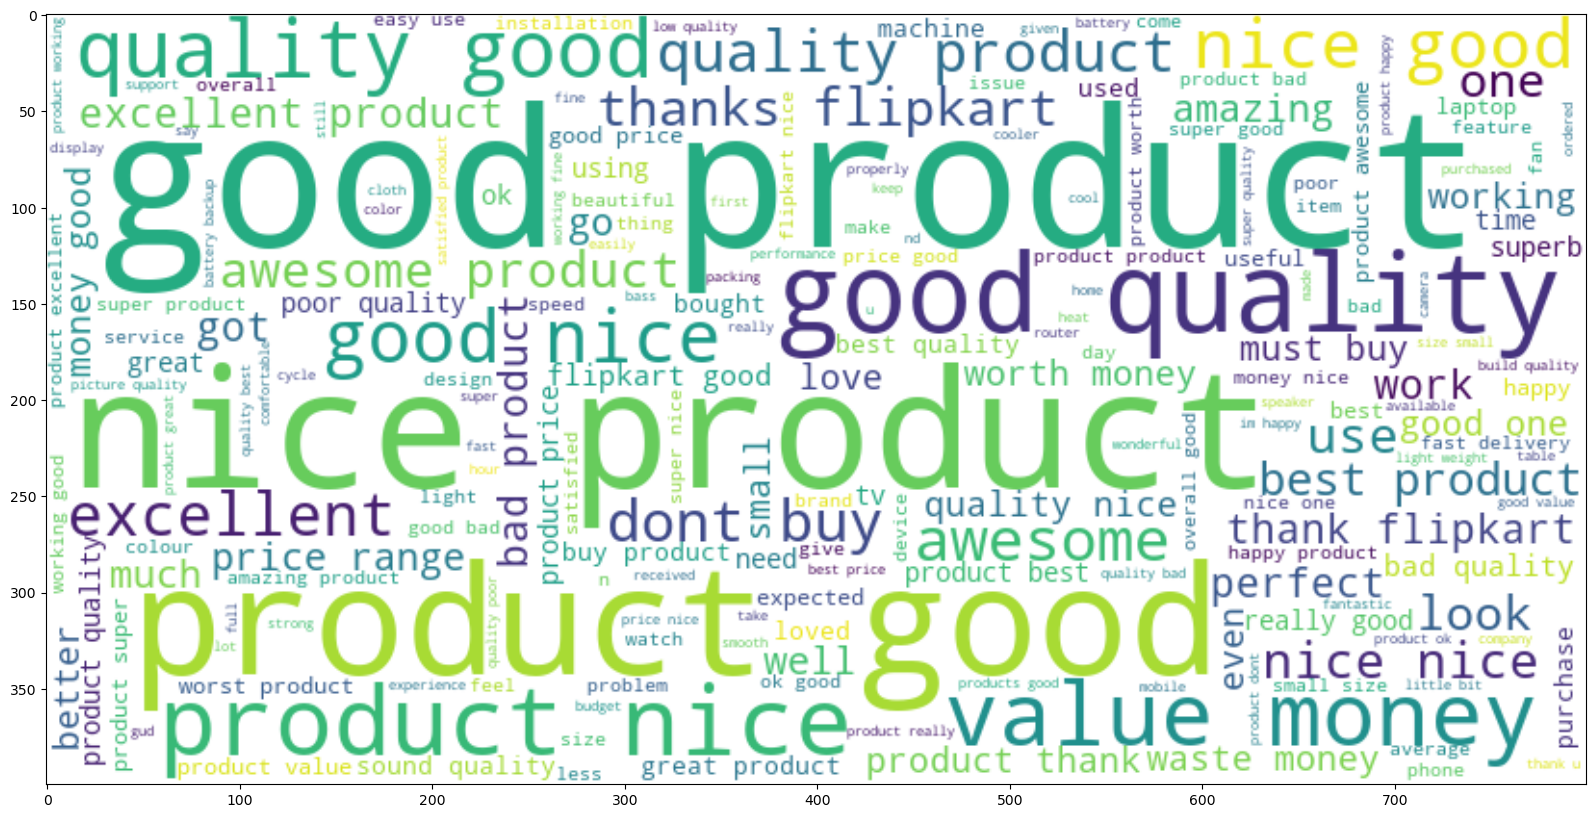

In [38]:
wordcloud=WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(30, 10))
plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis("off")
plt.show()

In [39]:
def summary_to_rowwise_list(summary):
    return summary.split()
text1=df['Summary'].apply(summary_to_rowwise_list)

In [42]:
text1.head()

0    [great, cooler, excellent, air, flow, price, a...
1           [best, budget, fit, cooler, nice, cooling]
2                  [quality, good, power, air, decent]
3                                  [bad, product, fan]
4                                    [ok, ok, product]
Name: Summary, dtype: object

In [44]:
import matplotlib.pyplot as plt

I count the Rate column values which are on positive side and which are on negative side --> 1 : positive , 0 : negative and draw the bar plot and pie chart for that

In [45]:
count_rate=df['Rate'].value_counts()
count_rate

Rate
1    126265
0     38747
Name: count, dtype: int64

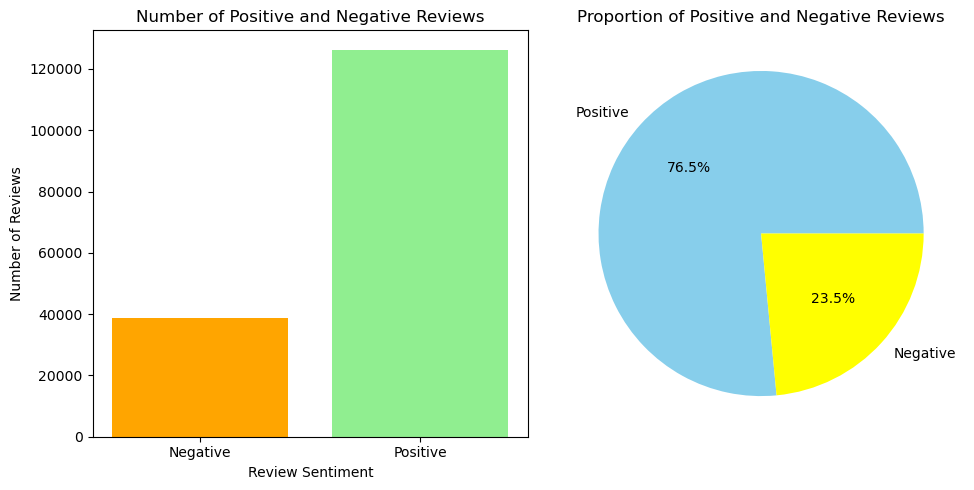

In [69]:
plot,values=plt.subplots(1,2, figsize=(10, 5))
values[0].bar(count_rate.index, count_rate.values, color=['lightgreen', 'orange'])
values[0].set_xlabel('Review Sentiment')
values[0].set_ylabel('Number of Reviews')
values[0].set_title('Number of Positive and Negative Reviews')
values[0].set_xticks([0, 1])
values[0].set_xticklabels(['Negative', 'Positive'])

values[1].pie(count_rate, labels=['Positive', 'Negative'], autopct='%1.1f%%', colors=['skyblue', 'yellow'])
values[1].set_title('Proportion of Positive and Negative Reviews')

plt.tight_layout()
plt.show()

In [70]:
from textblob import TextBlob

Here i use textblob to get the sentiment from summary column 

In [ ]:
def sentiment(text):
    return TextBlob(text).sentiment.polarity
df['sentiment']=df['Summary'].apply(sentiment)

Sentiment is group by with review,price and rate column and find mean to get the sentiment comparison values

In [72]:
Review_sentiment = df.groupby('Review')['sentiment'].mean().reset_index()
print(Review_sentiment)

Price_sentiment = df.groupby('Price')['sentiment'].mean().reset_index()
print(Price_sentiment)

Rate_sentiment = df.groupby('Rate')['sentiment'].mean().reset_index()
print(Rate_sentiment)

                                                Review  sentiment
0                            "Wise deal for the price"   0.444500
1     1) Product quality = 2 stars, Delivery = 5 stars   0.125000
2                     100% Satisfied from the Product.   0.436111
3                                       2 Thumbs up !!   0.550000
4                        2 weeks still no installation   0.500000
...                                                ...        ...
1260                                     worst product  -0.141667
1261             worst service from flipkart this time  -1.000000
1262                                      worth buying   0.000000
1263                                   worth for money   0.300000
1264                                     wrost product   0.105556

[1265 rows x 2 columns]
      Price  sentiment
0         2  -0.066667
1        15  -0.166667
2        59   0.425149
3        79   0.418631
4        95   0.142737
..      ...        ...
471   63990   0.469534

In [73]:
import seaborn as sns

C:\Users\ritik\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 152 (\x98) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ritik\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 159 (\x9f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ritik\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 145 (\x91) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ritik\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


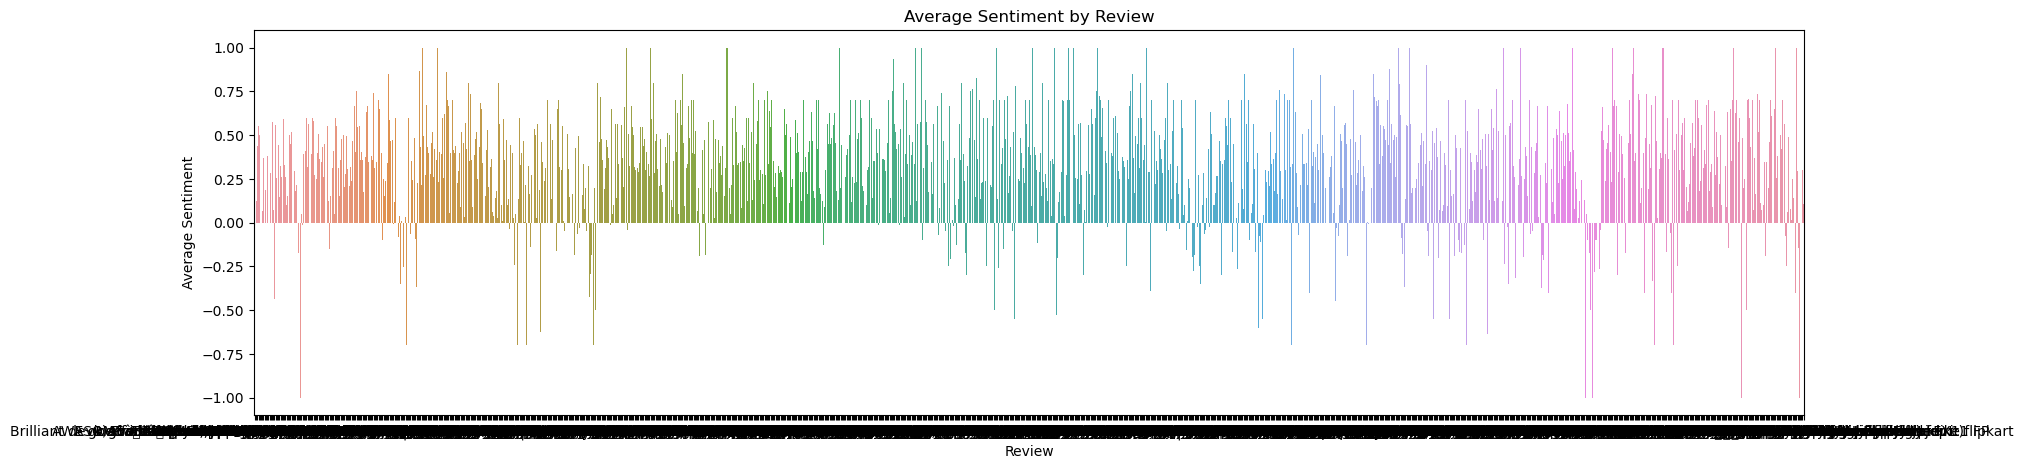

In [74]:
plt.figure(figsize=(20, 5))
sns.barplot(x='Review', y='sentiment', data=Review_sentiment)
plt.title('Average Sentiment by Review')
plt.xlabel('Review')
plt.ylabel('Average Sentiment')
plt.show()

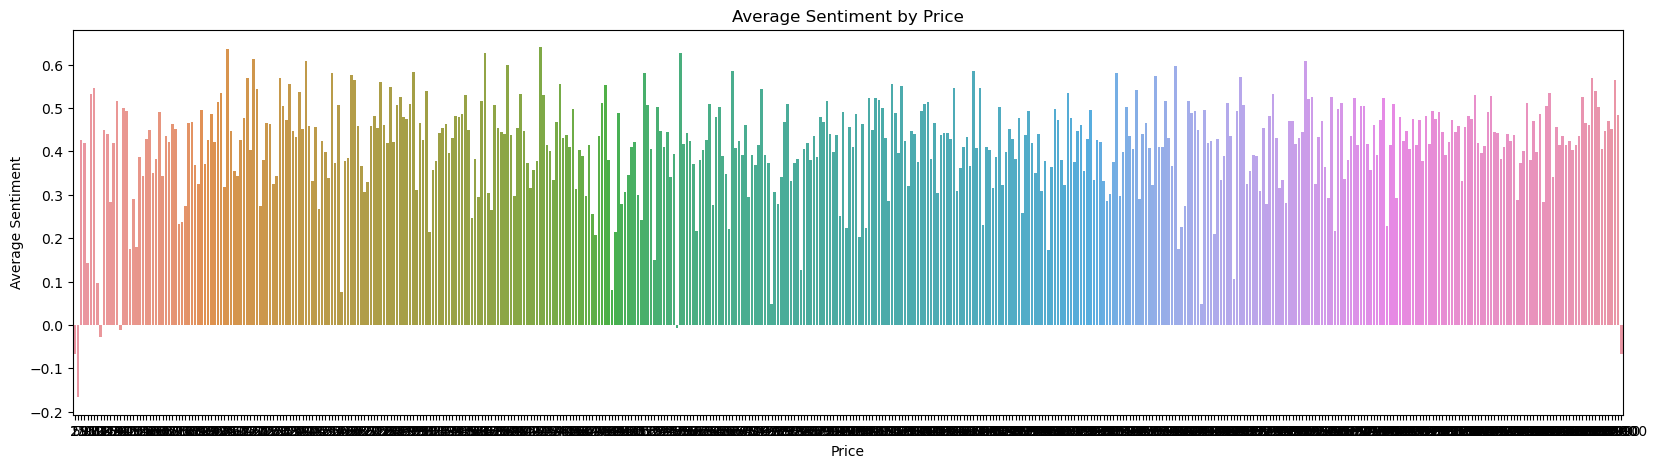

In [75]:
plt.figure(figsize=(20, 5))
sns.barplot(x='Price', y='sentiment', data=Price_sentiment)
plt.title('Average Sentiment by Price')
plt.xlabel('Price')
plt.ylabel('Average Sentiment')
plt.show()

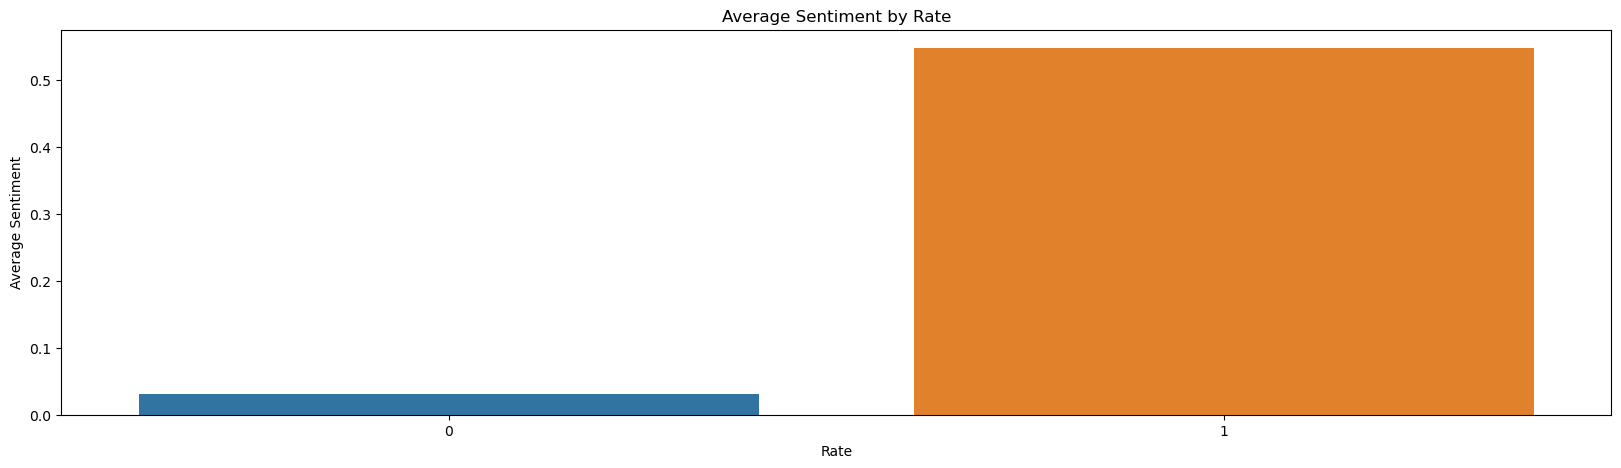

In [76]:
plt.figure(figsize=(20, 5))
sns.barplot(x='Rate', y='sentiment', data=Rate_sentiment)
plt.title('Average Sentiment by Rate')
plt.xlabel('Rate')
plt.ylabel('Average Sentiment')
plt.show()

In [77]:
df.head()

,ProductName,Price,Rate,Review,Summary,sentiment
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999,1,Super!,great cooler excellent air flow price amazing ...,0.725000
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999,1,Awesome,best budget fit cooler nice cooling,0.666667
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999,0,Fair,quality good power air decent,0.433333
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999,0,Useless product,bad product fan,-0.700000
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999,0,Fair,ok ok product,0.500000


In [78]:
df.to_csv("flipkart_product_cleaned_final_sentiment.csv", index=False)